In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [40]:
pip install yfinance

     |████████████████████████████████| 6.3MB 9.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=72b132eb81091e2749866453a72b9042bb32fa062421857801a65bf16341a2bc
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [47]:
import yfinance as yf
p = yf.download("BTC-USD", start = "2021-01-01", end = "2021-04-30")
df = pd.read_csv("/content/BTC 4 month data_og.csv")
#p.to_csv("/content/BTC 4 month data.csv")
print(df)

[*********************100%***********************]  1 of 1 completed
           Date         Open         High  ...    Adj Close        Volume  Days
0    2021-01-01  28994.00977  29600.62695  ...  29374.15234  4.073030e+10     1
1    2021-01-02  29376.45508  33155.11719  ...  32127.26758  6.786542e+10     2
2    2021-01-03  32129.40820  34608.55859  ...  32782.02344  7.866524e+10     3
3    2021-01-04  32810.94922  33440.21875  ...  31971.91406  8.116348e+10     4
4    2021-01-05  31977.04102  34437.58984  ...  33992.42969  6.754732e+10     5
..          ...          ...          ...  ...          ...           ...   ...
115  2021-04-26  49077.79297  54288.00391  ...  54021.75391  5.828404e+10   116
116  2021-04-27  54030.30469  55416.96484  ...  55033.11719  4.944822e+10   117
117  2021-04-28  55036.63672  56227.20703  ...  54824.70313  4.800057e+10   118
118  2021-04-29  54858.08984  55115.84375  ...  53555.10938  4.608893e+10   119
119  2021-04-30  53568.66406  57900.71875  ...  577

In [50]:
x = df["Days"].values
y = df["Adj Close"].values

x = x.reshape(-1,1)

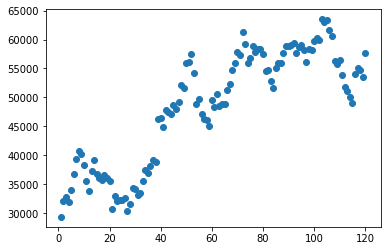

In [51]:
%matplotlib inline
plt.scatter(df["Days"], df["Adj Close"])

In [86]:
poly = PolynomialFeatures(degree = 9)
x_poly = poly.fit_transform(x)

In [87]:
poly.fit(x_poly, y)

PolynomialFeatures(degree=9, include_bias=True, interaction_only=False,
                   order='C')

In [88]:
lin = LinearRegression()
lin.fit(x_poly, y)
y_pred = lin.predict(x_poly)

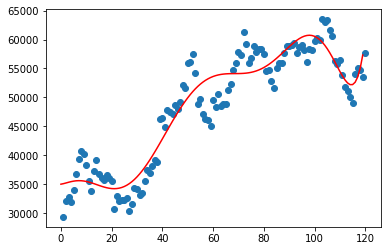

In [84]:
plt.scatter(df["Days"], df["Adj Close"])
plt.plot(y_pred, color = "red")

In [85]:
r2_score(y,y_pred)

0.896727881079519